## Графический метод решения задачи линейного программирования

### Теоретические основы графического метода решения задач линейного программирования

&#8195;&#8195;Наиболее простым и наглядным методом решения задач линейного программирования является графический метод. Он применяется для задач линейного программирования с двумя переменными, когда ограничения выражены неравенствами, и задач со многими переменными при условии, что в их канонической записи содержится не более двух свободных переменных.

&#8195;&#8195;Графический метод основан на геометрическом представлении допустимых решений и целевой функции задачи. Каждое из неравенств задачи линейного программирования определяет на координатной плоскости ($x_1$, $x_2$) некоторую полуплоскость. Пересечение этих полуплоскостей задает область допустимых решений (ОДР), то есть любая точка из этой области является решением системы ограничений.

&#8195;&#8195;В общем случае область допустимых решений может быть представлена одной из следующих фигур: выпуклым многоугольником, неограниченной многоугольной областью, лучом, отрезком, точкой или пустой областью. В последнем случае говорят, что ограничения не совместны.

#### Теперь вы можете перейти к заполнению данных для метода

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import HTML

%matplotlib notebook

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите на кнопку чтобы увидеть код"></form>''')

In [2]:
count = 0 # подсчет количества неравенств-ограничений
sep=''

print('Введите количество ограничений:')
n = int(input())
print("")

constr = np.zeros((n,4), dtype=int)
points = np.zeros((n,4), dtype=float)

print('Введите тип уравнения(max/min?)')
extr = str(input())
print("")

print('Введите коеффициенты целевой функции через пробел:')
cel = np.array(input().split()).astype(int)
print("")

print('F = '+ str(cel[0]) + 'x'+' + ' + str(cel[1]) + 'y ->' + extr)
print("")

for i in range(n):
    count+=1
    print("Введите коеффициенты " + str(count) + " неравенства через пробел:")
    constr[i]=input().split()
    print(" ")
    
print("Матрица ограничений:")
print(constr) 

Введите количество ограничений:
3

Введите тип уравнения(max/min?)
min

Введите коеффициенты целевой функции через пробел:
1 2

F = 1x + 2y ->min

Введите коеффициенты 1 неравенства через пробел:
5 -2 0 7
 
Введите коеффициенты 2 неравенства через пробел:
-1 2 0 5
 
Введите коеффициенты 3 неравенства через пробел:
1 1 0 6
 
Матрица ограничений:
[[ 5 -2  0  7]
 [-1  2  0  5]
 [ 1  1  0  6]]


### Алгоритм решения ЗЛП графическим способом

#### Шаг №1. 

&#8195;&#8195;Построим область допустимых решений, т.е. решим графически систему неравенств. Для этого построим каждую прямую и определим полуплоскости, заданные неравенствами.
Построим первое уравнение по двум точкам. Для нахождения первой точки приравниваем $x_1$ = 0. Для нахождения второй точки приравниваем $x_2$ = 0. Далее необходимо наносим прямую, которая у нас получилась, на координатную плоскость. Определим полуплоскость, задаваемую неравенством. Выбрав точку (0; 0), определим знак неравенства в полуплоскости. Подставим эту точку в неравенство и узнаем, в какой полуплоскости лежит прямая. Те же самые действия необходимо проделать с оставшимися неравенствами в системе.

&#8195;&#8195; Ниже представлена матрица с точками для прямых, первые 2 стлобца это координаты $x_1$, а последние 2 столбца это координаты $x_2$.

In [3]:
for i in range(n):
    res = float(constr[i][3]/constr[i][0]) #приравниваем к нулю Y
    res1 = float(constr[i][3]/constr[i][1]) #приравниваем к нулю X
    points[i][0] = res
    points[i][3] = res1
print("Координатная матрица:")
print(points)

Координатная матрица:
[[ 1.4  0.   0.  -3.5]
 [-5.   0.   0.   2.5]
 [ 6.   0.   0.   6. ]]


In [4]:
m1 = np.array([[constr[0][0],constr[0][1]], [constr[1][0], constr[1][1]]])
v1 = np.array([constr[0][3],constr[1][3]])

m2 = np.array([[constr[0][0],constr[0][1]], [constr[2][0], constr[2][1]]])
v2 = np.array([constr[0][3],constr[2][3]])

m3 = np.array([[constr[1][0],constr[1][1]], [constr[2][0], constr[2][1]]])
v3 = np.array([constr[1][3],constr[2][3]])

f_line = np.linalg.solve(m1,v1)
s_line = np.linalg.solve(m2,v2)
th_line = np.linalg.solve(m3,v3)

c = np.concatenate((f_line,s_line, th_line), axis=0)
b = c.reshape(-1, 2)

extrem = np.zeros(n, dtype=float)
for i in range(n):
    extrem[i] = cel[0]*b[i][0] + cel[1]*b[i][1]

In [5]:
def f_iter():
    coefficients = np.zeros((10), dtype=object)
    polynomial = np.zeros((10), dtype=object)
    x_axis = np.zeros((10), dtype=object)
    y_axis = np.zeros((10), dtype=object)

    ### Отрисовка линий после задающих их точек

    for i in range(n):
        coefficients[i] = np.polyfit([points[i][0], 0.0], [0.0, points[i][3]], 1)

    for i in range(n):
        polynomial[i] = np.poly1d(coefficients[i])

    for i in range(n):
        x_axis[i] = np.linspace(-2, 7)

    for i in range(n):
        y_axis[i] = polynomial[i](x_axis[i])

    ######

    #создание новой фигуры и ограничение для линейных графиков
    fig = plt.figure()
    
    axes = fig.add_subplot(111)
    axes.set_xlim(-1, 6)
    axes.set_ylim(-1, 6)
    plt.title('Построение функций по точкам', fontsize=12)
    plt.xlabel('Ось X', fontsize=12, color='black')
    plt.ylabel('Ось Y', fontsize=12, color='black')

    for i in range(n):
        axes.plot(x_axis[i], y_axis[i])

    #отрисовка точек по заданым параметрам
    for i in range(n):
        axes.plot(points[i][0], 0.0, 0.0, points[i][3], marker='o', color='black')

    #построение декартовой системы координат
    left,right = axes.get_xlim()
    low,high = axes.get_ylim()
    
    axes.grid(True)
    arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
    arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )

    ##### отрисовка точек пересечния прямых
    
def s_iter():
    coefficients = np.zeros((10), dtype=object)
    polynomial = np.zeros((10), dtype=object)
    x_axis = np.zeros((10), dtype=object)
    y_axis = np.zeros((10), dtype=object)

    ### Отрисовка линий после задающих их точек

    for i in range(n):
        coefficients[i] = np.polyfit([points[i][0], 0.0], [0.0, points[i][3]], 1)

    for i in range(n):
        polynomial[i] = np.poly1d(coefficients[i])

    for i in range(n):
        x_axis[i] = np.linspace(-2, 7)

    for i in range(n):
        y_axis[i] = polynomial[i](x_axis[i])

    ######

    #создание новой фигуры и ограничение для линейных графиков
    fig = plt.figure()
    
    axes = fig.add_subplot(111)
    axes.set_xlim(-1, 6)
    axes.set_ylim(-1, 6)
    
    plt.title('Построение радиус-вектора', fontsize=12)
    plt.xlabel('Ось X', fontsize=12, color='black')
    plt.ylabel('Ось Y', fontsize=12, color='black')

    for i in range(n):
        axes.plot(x_axis[i], y_axis[i])

    #отрисовка точек по заданым параметрам
    for i in range(n):
        axes.plot(points[i][0], 0.0, 0.0, points[i][3], marker='o', color='black')

    #построение декартовой системы координат
    left,right = axes.get_xlim()
    low,high = axes.get_ylim()

    arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
    arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )

    ##### отрисовка точек пересечния прямых
    axes.grid(True)
    axes.plot(f_line[0],f_line[1], marker = 'o', color='orangered')
    axes.plot(s_line[0],s_line[1], marker = 'o', color='orangered')
    axes.plot(th_line[0],th_line[1], marker = 'o', color='orangered')
    
def parall():
    def f(x):
        return -0.5*x + 2.5
    y = np.vectorize(f)
    x = np.linspace( -20.0, 20.0, 50)
    plt.grid(True)
    plt.plot(x,y(x))
    

def gradient():
    def f1(x):
        return 2*x + 0
    y = np.vectorize(f1)
    x = np.linspace(0, 1, 50)
    plt.grid(True)
    plt.plot(x,y(x))
    plt.plot([0,1],[0,2], marker = "o")
    
def th_iter():
    coefficients = np.zeros((10), dtype=object)
    polynomial = np.zeros((10), dtype=object)
    x_axis = np.zeros((10), dtype=object)
    y_axis = np.zeros((10), dtype=object)

    ### Отрисовка линий после задающих их точек

    for i in range(n):
        coefficients[i] = np.polyfit([points[i][0], 0.0], [0.0, points[i][3]], 1)

    for i in range(n):
        polynomial[i] = np.poly1d(coefficients[i])

    for i in range(n):
        x_axis[i] = np.linspace(-2, 7)

    for i in range(n):
        y_axis[i] = polynomial[i](x_axis[i])

    ######

    #создание новой фигуры и ограничение для линейных графиков
    fig = plt.figure()
    
    axes = fig.add_subplot(111)
    axes.set_xlim(-1, 6)
    axes.set_ylim(-1, 6)
    
    plt.title('Определение минимальной точки геометрическим способом', fontsize=12)
    plt.xlabel('Ось X', fontsize=12, color='black')
    plt.ylabel('Ось Y', fontsize=12, color='black')

    for i in range(n):
        axes.plot(x_axis[i], y_axis[i])

    #отрисовка точек по заданым параметрам
    for i in range(n):
        axes.plot(points[i][0], 0.0, 0.0, points[i][3], marker='o', color='black')

    #построение декартовой системы координат
    left,right = axes.get_xlim()
    low,high = axes.get_ylim()

    arrow( left, 0, right -left, 0, length_includes_head = True, head_width = 0.15 )
    arrow( 0, low, 0, high-low, length_includes_head = True, head_width = 0.15 )

    ##### отрисовка точек пересечния прямых
    axes.grid(True)
    axes.plot(f_line[0],f_line[1], marker = 'o', color='orangered')
    axes.plot(s_line[0],s_line[1], marker = 'o', color='orangered')
    axes.plot(th_line[0],th_line[1], marker = 'o', color='orangered')
    
    return fig
    
def line_anim(fig):
    
    def f(x):
        return -0.5*x + 2.5
    
    y = np.vectorize(f)
    x = np.linspace( -20.0, 20.0, 50)
    p_line, = plot(x,y(x))

    def animate(i):
        p_line.set_data(x,y(x)+i*0.05)
        return p_line,

    anima = FuncAnimation(fig, animate, frames=140, interval=50,blit = True)
    
t1 = plt.Polygon(b[:3,:], facecolor="blue", lw=0, alpha=0.2)

&#8195;&#8195; После построения полученных ранее прямых, наша система координат выглядит следующим образом.

<IPython.core.display.Javascript object>


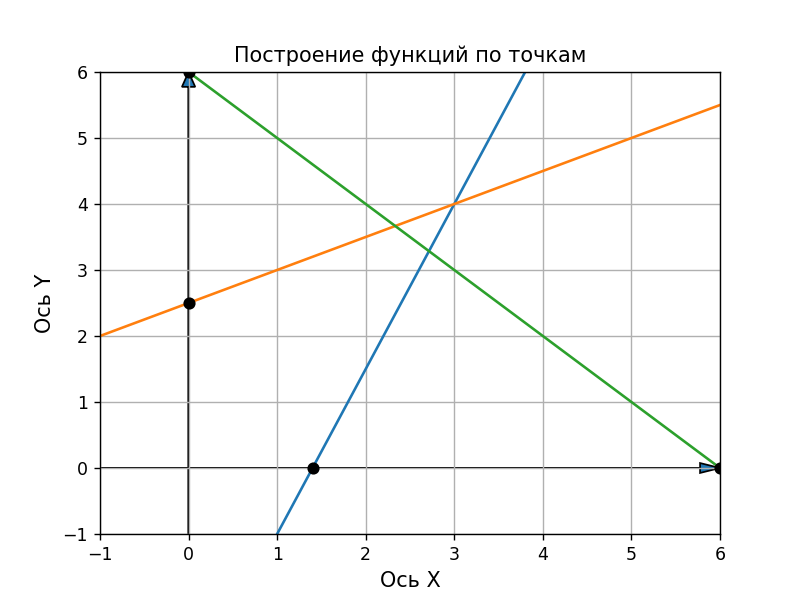

In [6]:
f_iter()

#### Шаг №2.
Формируем графическое изображение целевой функции.
    
&#8195;&#8195;Приравняем целевую функцию к постоянной величине L: L=${c_1x_1+c_2x_2}$. Это уравнение при фиксированном значении L определяет прямую, а при изменении L семейство параллельных прямых, каждая из которых называется линией уровня. Проводим линию уровня ${L_0}$.

&#8195;&#8195;Далее определяем направление возрастания целевой функции (вектор ${\overline{C}}$).Для определения направления максимального возрастания значения целевой функции строим вектор-градиент целевой функции, который начинается в точке (0,0), заканчивается в точке (${c_1x_1,c_2x_2}$). Если линия уровня и вектор-градиент построены верно, то они будут перпендикулярны.

&#8195;&#8195; Выделяем графически ту область, которая была отсечена построенными прямыми, это та область допустимых значений, в которой необходимо найти максимум или минимум, в зависимости от задания.

&#8195;&#8195; В результате всех действий, выполненных на данном этапе, получился следующий график:


<IPython.core.display.Javascript object>


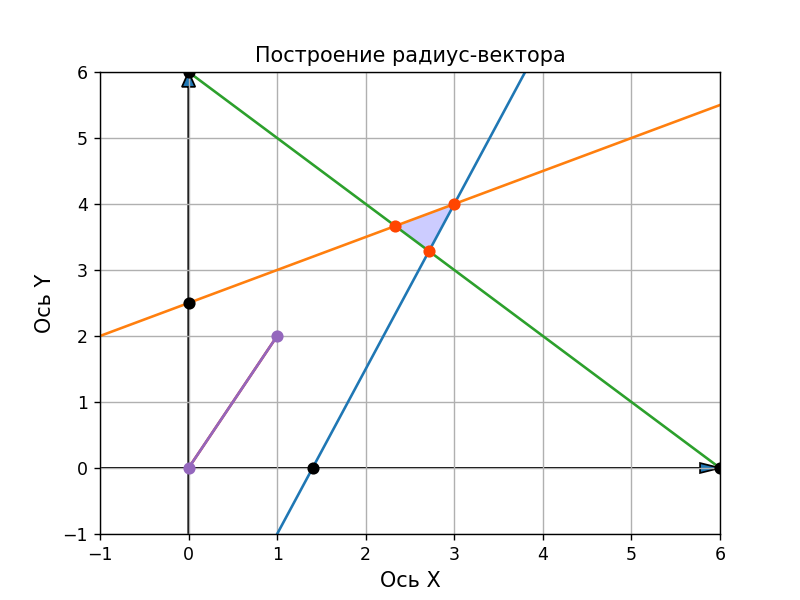

In [7]:
s_iter()
t1 = plt.Polygon(b[:3,:], facecolor="blue", lw=0, alpha=0.2)
plt.gca().add_patch(t1)
gradient()

#### Шаг №3.
Находим оптимальное решение задачи ЛП.
    
&#8195;&#8195; Линию уровня перемещаем по направлению вектора ${\overline{C}}$ для задач на максимум и в направлении, противоположном ${\overline{C}}$, для задач на минимум. Перемещение линии уровня производится до тех пор, пока у нее окажется только одна общая точка с областью допустимых решений (ОДР). Эта точка определяет единственное решение задачи ЛП и будет точкой экстремума.

&#8195;&#8195; Если окажется, что линия уровня параллельна одной из сторон ОДР, то задача ЛП будет иметь бесчисленное множество решений. Если ОДР представляет неограниченную область, то целевая функция может быть неограниченна. Задача ЛП может быть неразрешима, когда определяющие ее ограничения окажутся противоречивыми.

<IPython.core.display.Javascript object>


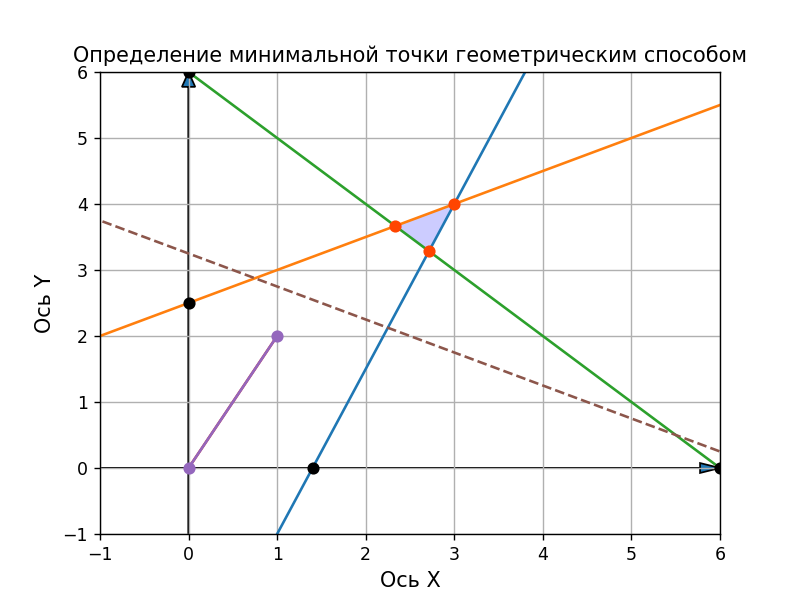

In [8]:
lol = th_iter()
t2 = plt.Polygon(b[:3,:], facecolor="blue", lw=0, alpha=0.2)
plt.gca().add_patch(t2)
gradient()

def f(x):
    return -0.5*x + 2.5
    
y = np.vectorize(f)
x = np.linspace( -20.0, 20.0, 50)
p_line, = plot(x,y(x), linestyle = '--')

def animate(i):
    p_line.set_data(x,y(x)+i*0.05)
    return p_line,

anima = FuncAnimation(lol, animate, frames=43, interval=50,blit = True)



#### Шаг №4.

Находим координаты точки экстремума и значение целевой функции в этой точке.
    
&#8195;&#8195; Для вычисления координат оптимальной точки решим систему уравнений прямых, на пересечении которых находится эта точка. Подставляя найденный результат в целевую функцию, получим искомое оптимальное значение целевой функции.



In [9]:
print("Матрица с точками пересечения функций:")
print(b)

Матрица с точками пересечения функций:
[[3.         4.        ]
 [2.71428571 3.28571429]
 [2.33333333 3.66666667]]


#### Итоговый ответ.

&#8195;&#8195; В результате всех вычислений мы получили следующий ответ:

In [10]:
extrem = np.zeros(n, dtype=float)
for i in range(n):
    extrem[i] = cel[0]*b[i][0] + cel[1]*b[i][1]
extrem
if (extr == 'max'):
    answer = np.amax(extrem)
if (extr == 'min'):
    answer = np.amin(extrem)
extr

print("Значение целевой функции равно: " + str(answer))

Значение целевой функции равно: 9.285714285714285
